#Numpy

In [ ]:
import numpy as np

NumPy package offers all the functionality needed to create and manipulate matrices. The ndarray objects allow fast creation of an array, such as a multidimensional matrix, by starting with data queued into lists

In [ ]:
X = np.array([[1.1, 1, 545, 1],[4.6, 0, 345, 2],
 [7.2, 1, 754, 3]])
print (X)

[[  1.1   1.  545.    1. ]
 [  4.6   0.  345.    2. ]
 [  7.2   1.  754.    3. ]]


Reshaping the single list into multidimensional array

In [ ]:
Y = np.array([1.1, 1, 545, 1, 4.6, 0, 345, 2, 7.2, 1, 754, 3]).reshape(3,4)
print(Y)

[[  1.1   1.  545.    1. ]
 [  4.6   0.  345.    2. ]
 [  7.2   1.  754.    3. ]]


In [ ]:
a = np.array([[1, 1],[1, 0]])
b = np.array([[1, 0],[0, 1]])
c=a-b
print (c)
print('\n')
print (a * -2)

[[ 0  1]
 [ 1 -1]]


[[-2 -2]
 [-2  0]]


multiplication on vectors and matrices we use the np.dot function 

In [ ]:
X = np.array([[4, 5],[2, 4],[3, 3]])
b = np.array([3,-2])
print(np.dot(X, b))

[ 2 -2  3]


In [ ]:
#[[3*4+(-2)*5  (-2)*4+5*5], [3*2+(-2)*4  (-2)*2+5*4], and so on ]
B = np.array([[3, -2],[-2, 5]])
print (np.dot(X, B))


[[ 2 17]
 [-2 16]
 [ 3  9]]


#Repairing Missing Data

In [ ]:
import pandas as pd
import numpy as np
data = pd.DataFrame([[1,2,np.nan],[np.nan,2,np.nan],
 [3,np.nan,np.nan],[np.nan,3,8],
 [5,3,np.nan]],columns=['A','B','C'])
print(data,'\n') # prints the data
# counts NaN values for each feature
print(data.isnull().sum(axis=0))

     A    B    C
0  1.0  2.0  NaN
1  NaN  2.0  NaN
2  3.0  NaN  NaN
3  NaN  3.0  8.0
4  5.0  3.0  NaN 

A    2
B    1
C    4
dtype: int64


In [ ]:
# Drops definitely C from the dataset
data.drop('C', axis=1, inplace=True)
# Creates a placeholder for B's missing values
data['missing_B'] = data['B'].isnull().astype(int)
# Fills missing items in B using B's average
data['B'].fillna(data['B'].mean(), inplace=True)
# Interpolates A
data['A'].interpolate(method='linear', inplace=True)
print(data)

     A    B  missing_B
0  1.0  2.0          0
1  2.0  2.0          0
2  3.0  2.5          1
3  4.0  3.0          0
4  5.0  3.0          0


#Compressing Data(PCA)

PCA works simply and straightforwardly: It takes as an input a dataset and returns a new, reconstructed dataset of the same shape. In this new dataset, all the features, called components, are uncorrelated, and the most informative components appear at the beginning of the dataset.
PCA also offers a report of how each component equates to the initial dataset. By  summing the informative value of the new components, you may find that a few  components express 90 percent or even 95 percent of the original information. Taking just those few components is equivalent to using the original data, thus achieving a compression of your data by removing redundancies and reducing the number of features.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
from sklearn import datasets
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X, y = data,target
print(X)
print(y)
pca = PCA().fit(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [ ]:
print (' '.join(['%5i'%(k+1) for k in range(13)]))
print (' '.join(['-----']*13))
print (' '.join(["%0.3f" % (variance) for variance
in pca.explained_variance_ratio_]))
print (' '.join(["%0.3f" % (variance) for variance
 in np.cumsum(pca.explained_variance_ratio_)]))

    1     2     3     4     5     6     7     8     9    10    11    12    13
----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
0.806 0.163 0.021 0.007 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.806 0.969 0.990 0.997 0.998 0.999 1.000 1.000 1.000 1.000 1.000 1.000 1.000


#Delimiting Anomalous Data


<ipython-input-81-db5fa7030326>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(C[:,0],C[:,1], s=2**7, edgecolors='white',


Text(0, 0.5, 'Component 2')

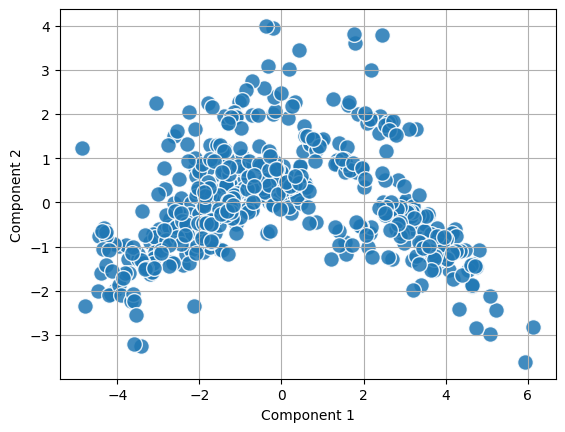

In [ ]:
pca = PCA()
pca.fit(scale(X))
C = pca.transform(scale(X))
import matplotlib.pyplot as plt
plt.scatter(C[:,0],C[:,1], s=2**7, edgecolors='white',
 alpha=0.85, cmap='autumn')
plt.grid() # adds a grid
plt.xlabel('Component 1') # adds label to x axis
plt.ylabel('Component 2') # adds label to y axis

<ipython-input-87-d40ad4ef1121>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(C[:,11],C[:,12], s=2**7, edgecolors='white',


Text(0, 0.5, 'Component 13')

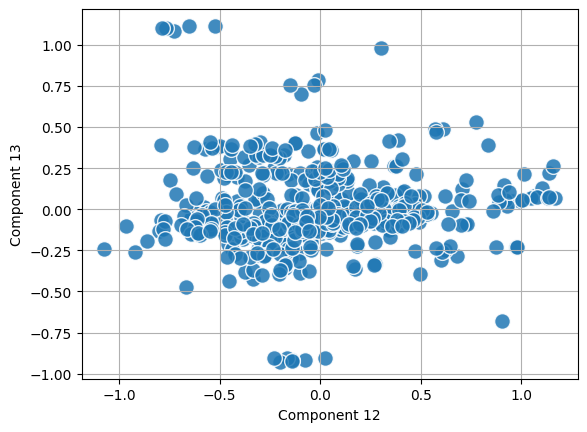

In [ ]:
plt.scatter(C[:,11],C[:,12], s=2**7, edgecolors='white',
 alpha=0.85, cmap='autumn')
plt.grid() # adds a grid
plt.xlabel('Component 12') # adds label to x axis
plt.ylabel('Component 13') # adds label to y axis

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
print ("Features :%s" % data.feature_names)
features = data.data
labels = data.target


Features :['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans
k_means = KMeans(n_clusters=3, init='k-means++',
 max_iter=999, n_init=1, random_state=101)
mb_k_means = MiniBatchKMeans(n_clusters=3, init='k-means++',
 max_iter=999, batch_size=10, n_init=1, random_state=101)
k_means.fit(features)
mb_k_means.fit(features)

MiniBatchKMeans(batch_size=10, max_iter=999, n_clusters=3, n_init=1,
                random_state=101)

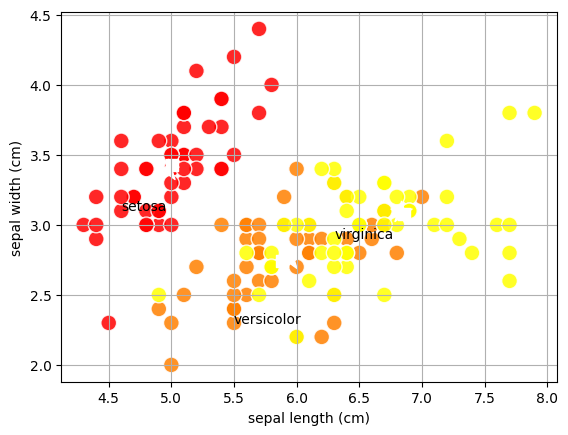

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(features[:,0], features[:,1], s=2**7, c=labels,
 edgecolors='white', alpha=0.85, cmap='autumn')
plt.grid() # adds a grid
plt.xlabel(data.feature_names[0]) # adds label to x axis
plt.ylabel(data.feature_names[1]) # adds label to y axis
# Printing centroids, first of regular K-means, then of minibatch
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
 s=2**6, marker='s', c='white')
plt.scatter(mb_k_means.cluster_centers_[:,0],
 mb_k_means.cluster_centers_[:,1], s=2**8,
 marker='*', c='white')
for class_no in range(0,3): # We just annotate a point for each class
  plt.annotate(data.target_names[class_no],
  (features[3+50*class_no,0],features[3+50*class_no,1]))
plt.show() # Showing the result

Experimenting with how centroids converge

In [ ]:
import numpy as np
np.set_printoptions(precision=3, suppress=True) # sets output 3 dec points
for iteration in range(1, 10):
 k_means = KMeans(n_clusters=3, init='random',
 max_iter=iteration, n_init=1, 
 random_state=101)
 k_means.fit(features)
 print ("Iteration: %i - 2nd centroid: %s" %
 (iteration, k_means.cluster_centers_[1]))

Iteration: 1 - 2nd centroid: [5.362 3.763 1.513 0.275]
Iteration: 2 - 2nd centroid: [4.959 3.363 1.467 0.248]
Iteration: 3 - 2nd centroid: [4.914 3.28  1.536 0.277]
Iteration: 4 - 2nd centroid: [4.878 3.2   1.578 0.298]
Iteration: 5 - 2nd centroid: [4.833 3.167 1.581 0.297]
Iteration: 6 - 2nd centroid: [4.8   3.125 1.603 0.306]
Iteration: 7 - 2nd centroid: [4.779 3.086 1.624 0.317]
Iteration: 8 - 2nd centroid: [4.771 3.071 1.625 0.307]
Iteration: 9 - 2nd centroid: [4.769 3.038 1.654 0.315]


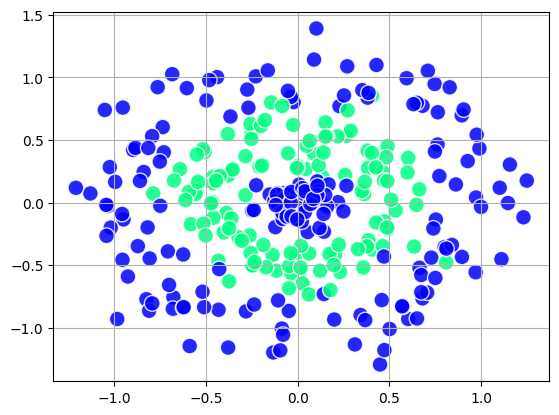

In [ ]:
import numpy as np
from sklearn.datasets import make_circles, make_blobs
strange_data = make_circles(n_samples=500, shuffle=True,
 noise=0.15, random_state=101,
 factor=0.5)
center = make_blobs(n_samples=100, n_features=2,
 centers=1, cluster_std=0.1,
 center_box=(0, 0))
first_half = np.row_stack((strange_data[0][:250,:],
 center[0][:50,:]))
first_labels = np.append(strange_data[1][:250],
 np.array([0]*50))
second_half = np.row_stack((strange_data[0][250:,:],
 center[0][50:,:]))
second_labels = np.append(strange_data[1][250:],
 np.array([0]*50))
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(first_half[:,0], first_half[:,1], s=2**7,
 c=first_labels, edgecolors='white',
 alpha=0.85, cmap='winter')
plt.grid() # adds a grid
plt.show() # Showing the result

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kNN = KNeighborsClassifier(n_neighbors=3,
 weights='uniform',
 algorithm='auto',
 metric='euclidean')
kNN.fit(first_half,first_labels)
print ("Learning accuracy score:%0.3f" %
 accuracy_score(y_true=second_labels,
 y_pred=kNN.predict(second_half)))

Learning accuracy score:0.933
